**Bar Chart**
- The columns are positioned over a label that represents a **categorical variable.**
- The height of the column indicates the size of the group defined by the categories.

**Histogram**
- The columns are positioned over a label that represents a **quantitative variable.**
- The column label can be a single value or a range of values.

Usually there is gap between columns in bar chart, but not in histgram.

Histogram from scratch
- Define value range of histogram bin_min, bin_max
- Divide range into bins bin[k], ..., bin[k]
- The bins may have variying width
- Count the number of samples in each bin sample_count[k]
- Draw a rectangle for each bin with height:
   - h[k] = sample_count[k] -- non normalized
   - h[k] = sample_count[k] / bin_width[k] -- normalized case

In [71]:
import numpy as np 
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt 
% matplotlib inline
import seaborn as sns

In [50]:
# get everything in the second column
x = np.loadtxt("DataSets/RequestRates.csv", delimiter = ",")[:, 1]

# some summary statistics
stats.describe(x)

# the range
print (np.sort(x)[0])
print (np.sort(x)[-1])

# quantiles 
print (np.percentile(x, [25, 50 ,75, 100]))

724.97277832
2054.3815918
[  905.91905212  1399.66320801  1626.32653809  2054.3815918 ]


In [52]:
# step 1: represents bins with a list of left-edges
bin_left = [500, 700, 800, 900, 1000, 1500, 1800, 2000, 2200]

bin_min = bin_left[0]
bin_max = bin_left[-1]

# create the bins with both edges, they could be of different length
bins = [[bin_left[i-1], bin_left[i]] for i in range(1 , len(bin_left))]
print ('Bins: {}'.format(bins))


Bins: [[500, 700], [700, 800], [800, 900], [900, 1000], [1000, 1500], [1500, 1800], [1800, 2000], [2000, 2200]]


enumerate(iterable[, start]) -> iterator for index, value of iterable

Return an enumerate object.  iterable must be another object that supports iteration.  
The enumerate object yields pairs containing a count (from start, which defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
(0, seq[0]), (1, seq[1]), (2, seq[2]), ...

In [60]:
for i, bin in enumerate(bins):
    print (i, bin)

0 [500, 700]
1 [700, 800]
2 [800, 900]
3 [900, 1000]
4 [1000, 1500]
5 [1500, 1800]
6 [1800, 2000]
7 [2000, 2200]


In [65]:
# step 2: count the number of samples in bins 
# as histogram is still a plot of number of points that fall into each bin
# when it is not normalized 
# if it is normalized, it is the area of the bins that explains the number of samples in each bin

def count(x, bins):
    def findbin(x, bins):
        for i, bin in enumerate(bins):
            left, right = bin
            if left <= x and x < right:
                return i
        return None

    count = [0] * len(bins)
    for x in x:
        i = findbin(x, bins)
        if i != None:
            count[i] += 1
            
    return count 

sample_count = count(x, bins)

print ("counts: {}".format(sample_count))

counts: [0, 10, 8, 4, 25, 23, 4, 2]


In [70]:
sum([0, 10, 8, 4, 25, 23, 4, 2])

76

- use *args when you're not sure how many arguments might be passed to your function, i.e. it allows you pass an arbitrary number of arguments to your function.

- Similarly, ****kwargs allows you to handle named arguments that you have not defined in advance

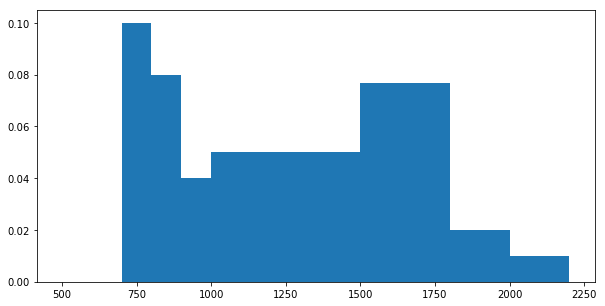

In [103]:
# step 3: plot the histogram
# normalized histogram has bin area as the number of samples fall into that bin


def histogram (x, bins, normed = True, **kwargs):
    # get the left edge for each bin then use the right edge together to find the widh of the bin
    bin_left = [ i for i, r in bins]
    # plot should have left edges of bins aligned with the bin_left list 
    bin_width =[ r - i for i, r in bins]
    bin_height = [
        float(c/ w) if normed else c
        for c, w in zip(count(x, bins), bin_width)
    ]
    
    plt.bar(bin_left, width = bin_width, align = 'edge', height = bin_height, **kwargs)
    
plt.figure(figsize = (10, 5))

histogram(x, bins)

[500, 700, 800, 900, 1000, 1500, 1800, 2000]
[200, 100, 100, 100, 500, 300, 200, 200]
[[500, 700], [700, 800], [800, 900], [900, 1000], [1000, 1500], [1500, 1800], [1800, 2000], [2000, 2200]]
[0.0, 0.1, 0.08, 0.04, 0.05, 0.07666666666666666, 0.02, 0.01]


<Container object of 8 artists>

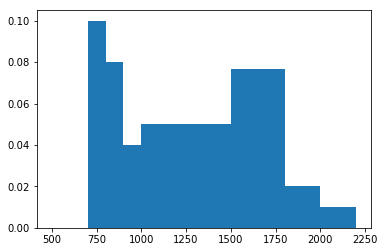

In [101]:
print (bin_left)
print (bin_width)
bin_height = [ c/w for c,w in zip(count(x, bins), bin_width)]
print (bins)
print (bin_height)

plt.bar(bin_left, width = bin_width, height = bin_height, align = "edge")

In [94]:
# choice of bins influences the look of the histogram

In [95]:
# plt.hist(x)

In [96]:
def plot_hist(x, bin_min, bin_max, bin_width):
    plt.figure (figsize = (10, 10))
    bins = [[i, i + bin_width] for i in np.arange(bin_min, bin_max, bin_width)]
    histogram(x, bins)
    
    print ("histogram with bin_width: {}".format(bin_width))
    
    plt.show()

histogram with bin_width: 10


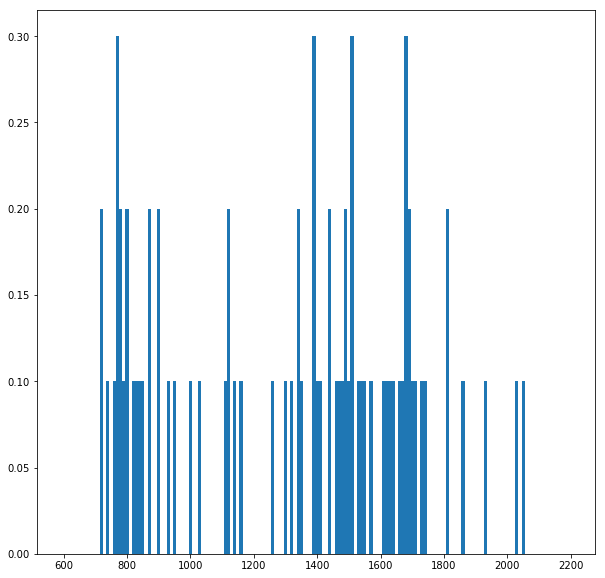

In [97]:
bin_min = 600
bin_max = 2200
plot_hist(x, bin_min, bin_max, 10)

In [98]:
min(x)

724.97277832031205